In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from scripts.bloom_gen import BloomQuestionGenerator
from scripts.chunk import TextChunker

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Test Bloom Question Generation

In [2]:
with open('../data/AI_Articles/Artificial intelligence.txt', 'r') as file:
    text = file.read()

In [3]:
chunker = TextChunker()
chunks = chunker.recursive_chunk(text, chunk_size=256, by_tokens=True)
print(len(chunks))
print(chunks[0])

106
Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs.
High-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common e

In [4]:
bloom_generator = BloomQuestionGenerator()
question = bloom_generator.generate_question(chunks[0], question_type="MCQ", level=5, prompt_type="basic")
print(question)

Which of the following statements best evaluates the perception and labeling of AI applications in our daily lives?
A) Once an AI application becomes useful and common, it continues to be recognized and labeled as AI.
B) AI applications are always recognized and labeled as such, regardless of their usefulness or prevalence.
C) As AI applications become more useful and common, they often lose their AI labeling as they integrate into general applications.
D) The labeling and recognition of AI applications have no correlation with their usefulness and commonality.


In [31]:
question = bloom_generator.generate_question(chunks[0], question_type="SAQ", level=2, prompt_type="desc")
print(question)

Can you explain why some applications of artificial intelligence are not always recognized or labeled as such, despite their widespread use and utility?


In [20]:
question = bloom_generator.generate_question(chunks[0], question_type="SAQ", level=6, prompt_type="desc_examples")
print(question)

Can you propose a novel application for artificial intelligence, based on your understanding of its capabilities and existing uses, and explain how it would function and contribute to its field of application?


### Evalutate Generated Questions with BloomBERT

In [25]:
bloom_generator.evaluate_question(question, level=6)

{'blooms_level': 'Create', 'probabilities': {'Analyse': 0.00453, 'Apply': 0.00974, 'Create': 0.96269, 'Evaluate': 0.01285, 'Remember': 0.00463, 'Understand': 0.00555}}


(6, True)

In [5]:
# Create a DataFrame with col names: 'question_type', 'prompt_type', 'gen_question', 'level', 'predicted_level', 'is_correct' 
# with 10 records for each combination of question_type, prompt_type, and level

question_types = ['MCQ', 'SAQ']
prompt_types = ['basic', 'desc', 'desc_examples']
levels = range(1, 7)

data = []
for question_type in tqdm(question_types, desc="Question Types"):
    for prompt_type in tqdm(prompt_types, desc="Prompt Types"):
        for level in tqdm(levels, desc="Levels"):
            for _ in range(10):
                random_chunk = np.random.choice(chunks)
                question = bloom_generator.generate_question(random_chunk, question_type=question_type, level=level, prompt_type=prompt_type)
                predicted_level, is_correct = bloom_generator.evaluate_question(question, level)
                data.append([question_type, prompt_type, question, level, predicted_level, is_correct])

df = pd.DataFrame(data, columns=['question_type', 'prompt_type', 'gen_question', 'level', 'predicted_level', 'is_correct'])

Question Types:   0%|          | 0/2 [00:00<?, ?it/s]

Prompt Types:   0%|          | 0/3 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Prompt Types:   0%|          | 0/3 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
# save the DataFrame to a csv file
df.to_csv('questions.csv', index=False)

In [7]:
df.head()

,question_type,prompt_type,gen_question,level,predicted_level,is_correct
0,MCQ,basic,Which company developed the AlphaGo program th...,1,6,False
1,MCQ,basic,What is the emerging field that attempts to br...,1,6,False
2,MCQ,basic,What term is used to describe a hypothetical e...,1,1,True
3,MCQ,basic,What philosophical position proposes that the ...,1,2,False
4,MCQ,basic,"What percentage of American citizens, accordin...",1,5,False


In [52]:
# For each pompt type, print the percentage of is_correct regardless of question type and level
for prompt_type in prompt_types:
    prompt_df = df[df['prompt_type'] == prompt_type]
    correct_percentage = prompt_df['is_correct'].mean() * 100
    print(f"Prompt Type: {prompt_type}, Correct Percentage: {correct_percentage:.2f}%")


Prompt Type: basic, Correct Percentage: 49.17%
Prompt Type: desc, Correct Percentage: 53.33%
Prompt Type: desc_examples, Correct Percentage: 43.33%


In [ ]:
# For each pompt type, print the percentage of is_correct depending on question type
for prompt in prompt_types:
    print(f'Prompt Type: {prompt}')
    for question_type in question_types:
        percentage = df[(df['prompt_type'] == prompt) & (df['question_type'] == question_type)]['is_correct'].mean() * 100
        print(f'Question Type: {question_type}, Percentage of generated questions correctly classified: {percentage:.2f}%')
    print('\n')

Prompt Type: basic
Question Type: MCQ, Percentage of generated questions correctly classified: 45.00%
Question Type: SAQ, Percentage of generated questions correctly classified: 53.33%


Prompt Type: desc
Question Type: MCQ, Percentage of generated questions correctly classified: 45.00%
Question Type: SAQ, Percentage of generated questions correctly classified: 61.67%


Prompt Type: desc_examples
Question Type: MCQ, Percentage of generated questions correctly classified: 36.67%
Question Type: SAQ, Percentage of generated questions correctly classified: 50.00%




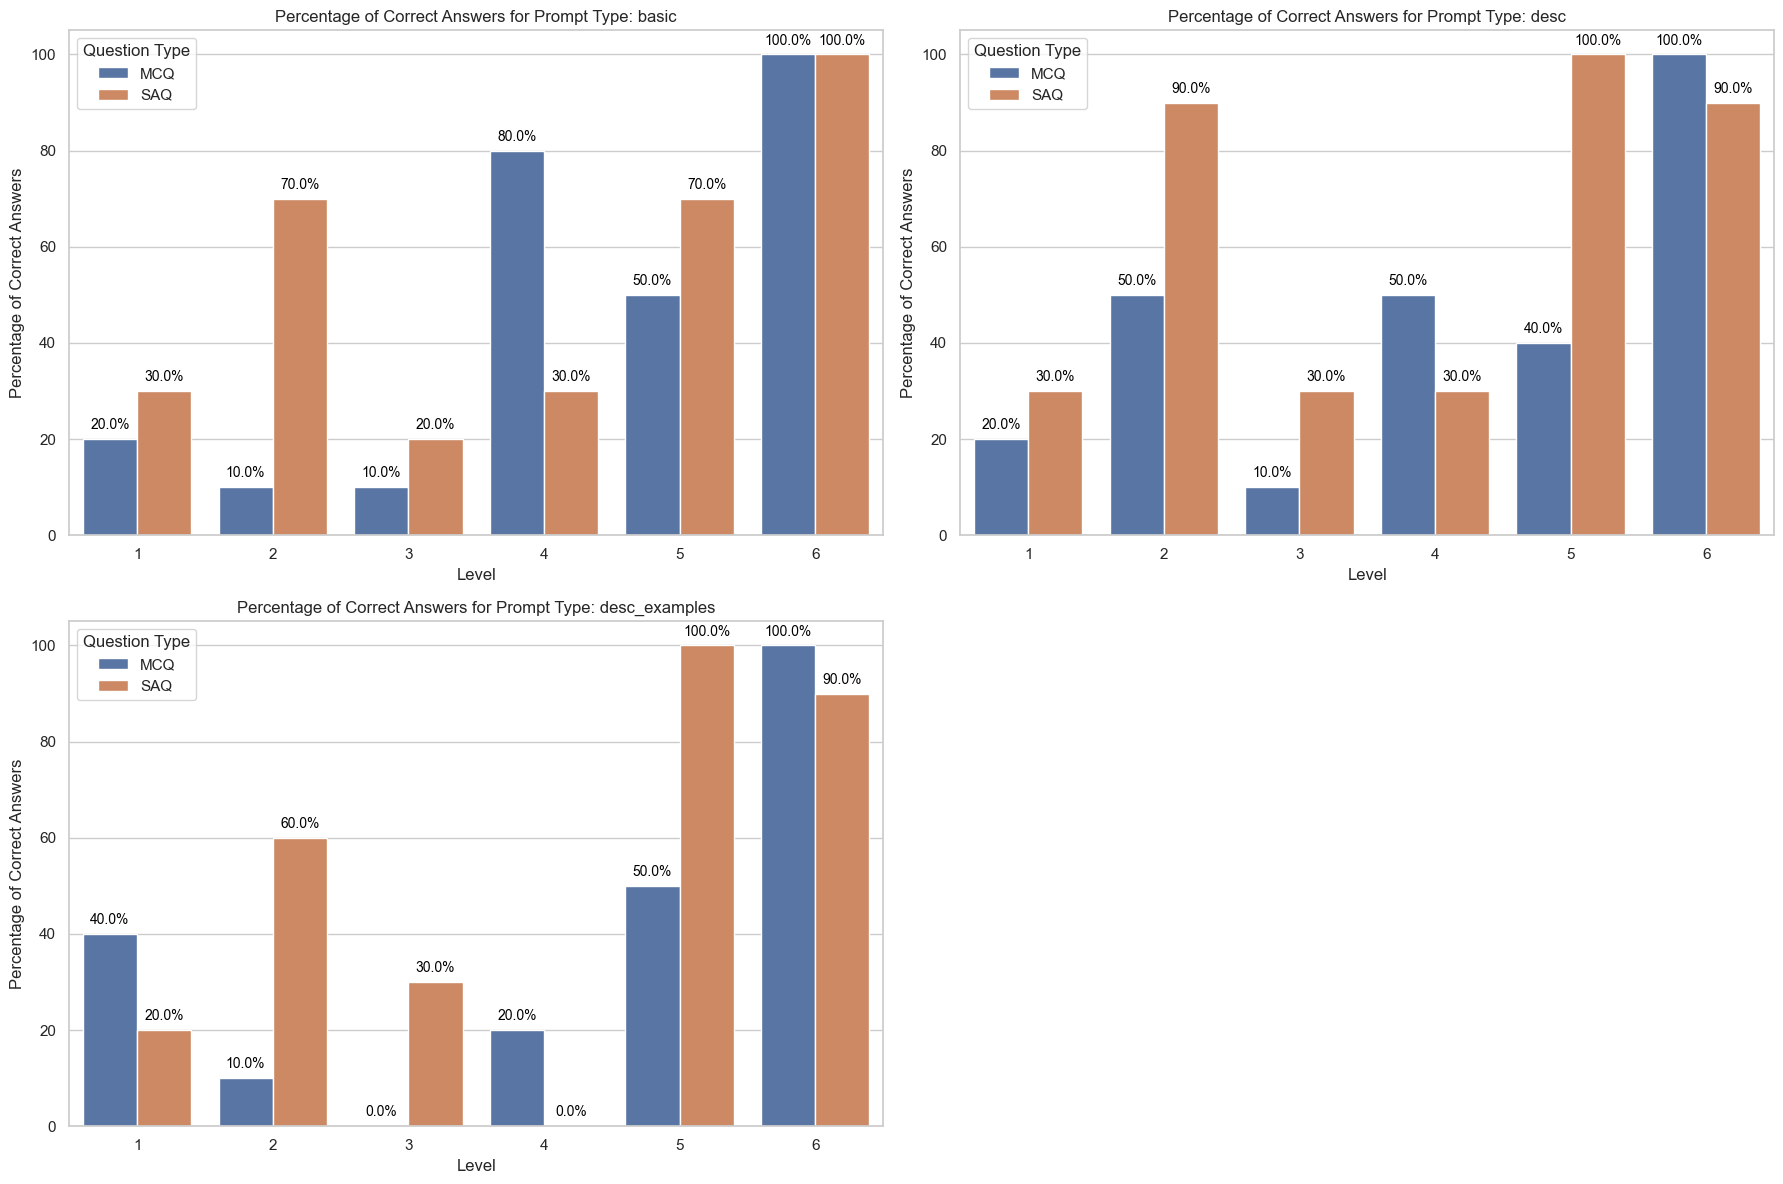

In [46]:
# Plot the percentage of is_correct for each combination of question_type, prompt_type as bar plot with level on x-axis and percentage of is_correct on y-axis
plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")

# Create a separate plot for each prompt type
for i, prompt in enumerate(prompt_types, 1):
    plt.subplot(2, 2, i)
    ax = sns.barplot(
        data=df[df['prompt_type'] == prompt],
        x='level',
        y='is_correct',
        hue='question_type',
        errorbar=None,
        estimator=lambda x: np.mean(x) * 100
    )
    plt.title(f'Percentage of Correct Answers for Prompt Type: {prompt}')
    plt.xlabel('Level')
    plt.ylabel('Percentage of Correct Answers')
    plt.legend(title='Question Type')

    # Add percentage values above each bar
    for i in range(6):
        for j in range(2):
            bar = ax.patches[i * 2 + j]
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%', 
                        (bar.get_x() + bar.get_width() / 2., height), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')
        
plt.tight_layout()
plt.show()